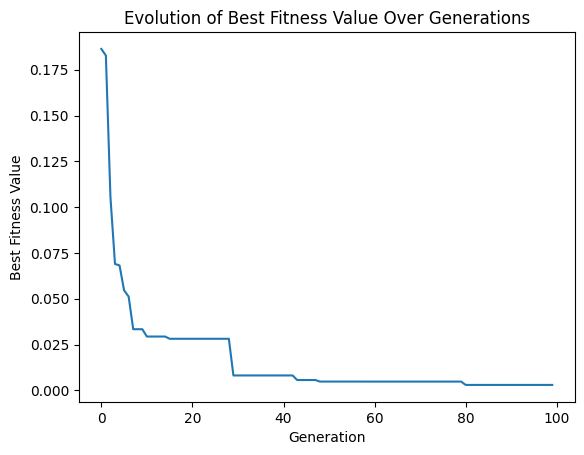

Optimized inputs: [0.48815973 0.50979585 0.54336556 0.4978689  0.49025414 0.51232731
 0.47622368]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def genetic_algorithm(objective_function, num_variables=7, num_generations=100, population_size=50, mutation_rate=0.1):
    # Initialize population
    population = np.random.rand(population_size, num_variables)

    # Store the best value for plotting
    best_values = []

    for generation in range(num_generations):
        # Evaluate fitness
        fitness = np.array([objective_function(ind) for ind in population])

        # Store the best fitness value for this generation
        best_values.append(np.min(fitness))

        # Selection: choose the best individuals to form a new population
        selected_indices = np.argsort(fitness)[:population_size // 2]
        selected_population = population[selected_indices]

        # Crossover: producing new individuals
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = selected_population[np.random.choice(selected_population.shape[0], 2, replace=False)]
            crossover_point = np.random.randint(1, num_variables - 1)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring.append(child)

        # Mutation: random changes in the offspring
        for i in range(len(offspring)):
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_variables)
                offspring[i][mutation_index] = np.random.rand()

        # Create the new population
        population = np.vstack((selected_population, offspring))

    # Plotting the evolution of the best fitness value
    plt.plot(best_values)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Value')
    plt.title('Evolution of Best Fitness Value Over Generations')
    plt.show()

    # Return the best individual found
    best_index = np.argmin(fitness)
    return population[best_index]

# Example usage
def objective_function(variables):
    return sum((variables - 0.5) ** 2)  # Minimizing the distance to [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

optimal_inputs = genetic_algorithm(objective_function)
print("Optimized inputs:", optimal_inputs)

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

# 定义目标函数
def target_function(x):
    return sum(x_i**2 + np.sin(5 * x_i) for x_i in x)

# 定义变量范围
dim = 10  # 问题维度
bounds = [(-5, 5) for _ in range(dim)]  # 每个变量范围为 [-5, 5]

# 调用遗传算法进行优化
result = differential_evolution(target_function, bounds, strategy='best1bin', 
                                mutation=(0.5, 1), recombination=0.7, 
                                popsize=15, maxiter=100, disp=True)

# 输出优化结果
print("\n优化完成！")
print(f"最优解：{result.x}")  # 最优解
print(f"目标函数值：{result.fun}")  # 最优目标值


differential_evolution step 1: f(x)= 11.197733597231258
differential_evolution step 2: f(x)= 11.197733597231258
differential_evolution step 3: f(x)= 10.31654885594171
differential_evolution step 4: f(x)= 10.31654885594171
differential_evolution step 5: f(x)= 2.7541769623296823
differential_evolution step 6: f(x)= 2.7541769623296823
differential_evolution step 7: f(x)= 2.7541769623296823
differential_evolution step 8: f(x)= 2.7541769623296823
differential_evolution step 9: f(x)= 2.371209704874908
differential_evolution step 10: f(x)= 1.2714651442386231
differential_evolution step 11: f(x)= 1.2714651442386231
differential_evolution step 12: f(x)= 1.2714651442386231
differential_evolution step 13: f(x)= 0.6050771549568903
differential_evolution step 14: f(x)= 0.6050771549568903
differential_evolution step 15: f(x)= 0.25873516138492303
differential_evolution step 16: f(x)= -2.7865027734974377
differential_evolution step 17: f(x)= -2.7865027734974377
differential_evolution step 18: f(x)= -2

In [3]:
!pip install pygmo

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 4.3 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pygmo as pg
import numpy as np

# 定义自定义目标函数问题
class CustomProblem:
    def __init__(self, dim):
        self.dim = dim  # 定义维度

    def fitness(self, x):
        # 目标函数：f(x) = sum(x_i^2 + sin(5x_i))
        return [sum(x_i**2 + np.sin(5 * x_i) for x_i in x)]

    def get_bounds(self):
        # 定义变量范围，比如 [-5, 5] 对于每个维度
        return ([-5] * self.dim, [5] * self.dim)

# 创建问题实例
dim = 10  # 维度
problem = pg.problem(CustomProblem(dim))

# 配置遗传算法（GA）
ga = pg.algorithm(pg.sga(gen=100, cr=0.9, m=0.02, param_m=1.0, param_s=2))
ga.set_verbosity(10)  # 每隔10代打印一次进度

# 创建初始种群
population_size = 50
population = pg.population(problem, size=population_size)

# 演化种群
print("开始使用GA优化目标函数...")
population = ga.evolve(population)

# 输出优化结果
print("\n优化完成！")
print(f"最优解：{population.champion_x}")  # 最优解
print(f"目标函数值：{population.champion_f[0]}")  # 最优目标值


开始使用GA优化目标函数...

优化完成！
最优解：[-0.30932691 -0.28725204 -0.31954861 -0.36232085 -0.27116836 -0.30988037
 -0.290939   -0.27981741 -0.31388041 -0.31522052]
目标函数值：-8.974787621675429

   Gen:        Fevals:          Best:   Improvement:
      1             50        30.7041              0
     11            550       -1.71124              0
     21           1050        -4.7926       0.635039
     31           1550       -6.41493       0.777377
     41           2050       -7.63012      0.0491746
     51           2550         -8.747              0
     61           3050       -8.85932              0
     71           3550       -8.87261              0
     81           4050       -8.88843              0
     91           4550       -8.97479     -0.0475604
